In [41]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
import PlaceCellAnalysis as pc

os.sys.path.append('../')
import utilities as u
import preprocessing as pp
import behavior as b

from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.svm import SVC, LinearSVC
import logistic_regression


%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
# load session
mouse = '4139251.1'
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

df_mouse = df[df['MouseName'].str.match(mouse)]
# df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse

G:\My Drive\VR_Data\TwoTower\behavior.sqlite


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
1046,4139251.1,19_01_2019,1,Reversal_noTimeout,60,1,CA1,2019-01-19,G:\My Drive\VR_Data\TwoTower\4139251.1\19_01_2...,None,G:\My Drive\2P_Data\TwoTower\4139251.1\19_01_2...,G:\My Drive\2P_Data\TwoTower\4139251.1\19_01_2...
1048,4139251.1,19_01_2019,3,Reversal_noTimeout,60,1,CA1,2019-01-19,G:\My Drive\VR_Data\TwoTower\4139251.1\19_01_2...,None,G:\My Drive\2P_Data\TwoTower\4139251.1\19_01_2...,G:\My Drive\2P_Data\TwoTower\4139251.1\19_01_2...
1075,4139251.1,21_01_2019,2,Reversal_noTimeout,59,1,CA1,2019-01-21,G:\My Drive\VR_Data\TwoTower\4139251.1\21_01_2...,None,G:\My Drive\2P_Data\TwoTower\4139251.1\21_01_2...,G:\My Drive\2P_Data\TwoTower\4139251.1\21_01_2...
1111,4139251.1,23_01_2019,2,Reversal,35,1,CA1,2019-01-23,G:\My Drive\VR_Data\TwoTower\4139251.1\23_01_2...,None,G:\My Drive\2P_Data\TwoTower\4139251.1\23_01_2...,G:\My Drive\2P_Data\TwoTower\4139251.1\23_01_2...
1141,4139251.1,25_01_2019,3,Reversal,50,1,CA1,2019-01-25,G:\My Drive\VR_Data\TwoTower\4139251.1\25_01_2...,None,G:\My Drive\2P_Data\TwoTower\4139251.1\25_01_2...,G:\My Drive\2P_Data\TwoTower\4139251.1\25_01_2...
1169,4139251.1,28_01_2019,3,Reversal,47,1,CA1,2019-01-28,G:\My Drive\VR_Data\TwoTower\4139251.1\28_01_2...,None,G:\My Drive\2P_Data\TwoTower\4139251.1\28_01_2...,G:\My Drive\2P_Data\TwoTower\4139251.1\28_01_2...
1208,4139251.1,30_01_2019,2,Reversal,40,1,CA1,2019-01-30,G:\My Drive\VR_Data\TwoTower\4139251.1\30_01_2...,None,G:\My Drive\2P_Data\TwoTower\4139251.1\30_01_2...,G:\My Drive\2P_Data\TwoTower\4139251.1\30_01_2...
1236,4139251.1,31_01_2019,2,Reversal,70,1,CA1,2019-01-31,G:\My Drive\VR_Data\TwoTower\4139251.1\31_01_2...,None,G:\My Drive\2P_Data\TwoTower\4139251.1\31_01_2...,G:\My Drive\2P_Data\TwoTower\4139251.1\31_01_2...
1257,4139251.1,01_02_2019,4,Reversal,48,1,CA1,2019-02-01,G:\My Drive\VR_Data\TwoTower\4139251.1\01_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139251.1\01_02_2...,G:\My Drive\2P_Data\TwoTower\4139251.1\01_02_2...
1274,4139251.1,02_02_2019,3,Reversal,68,1,CA1,2019-02-02,G:\My Drive\VR_Data\TwoTower\4139251.1\02_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139251.1\02_02_2...,G:\My Drive\2P_Data\TwoTower\4139251.1\02_02_2...


In [103]:
sess = df_mouse.iloc[3]
print(sess['data file'])

G:\My Drive\VR_Data\TwoTower\4139251.1\23_01_2019\Reversal_2.sqlite


In [104]:

VRDat,C, S, A = pp.load_scan_sess(sess)
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values)

num aberrant ttls 0.0


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:279: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:278: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])


In [105]:
bin_edges= np.arange(0,451,20)
bin_edges[-1]=455
nbins = bin_edges.shape[0]-1
pos_mask = VRDat.pos._values>0



In [106]:
dig = np.digitize(VRDat.pos._values,bin_edges)
print(np.unique(dig))
print(bin_edges[-1],np.amax(VRDat.pos._values))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
455 449.84929197531426


In [107]:
train_mask = pos_mask & ((VRDat.morph==1) | (VRDat.morph==0.)) 


In [108]:
lr = LogisticRegression(C=.001,penalty='l2',class_weight="balanced",multi_class='multinomial',solver='lbfgs')
X = np.digitize(VRDat.pos._values,bin_edges)+nbins*VRDat.morph._values*pos_mask 
Xhat =np.zeros([X.shape[0],nbins*2])
train_trials = (trial_info['morphs']==0) | (trial_info['morphs']==1)
LOO = u.LOTrialO(tstart_inds[train_trials],teleport_inds[train_trials],S.shape[0])
for i,(train,test) in enumerate(LOO):
    print(i)
    ttrain = train & pos_mask
    lr.fit(S[ttrain,:],X[ttrain])
    Xhat[test,:]=lr.predict_proba(S[test])
    
#lr = LogisticRegression(C=.001,penalty='l2',class_weight="balanced",multi_class='multinomial',solver='lbfgs')

lr.fit(S[train_mask,:],np.digitize(VRDat.pos._values[train_mask],bin_edges)+(bin_edges.shape[0]-1)*VRDat.morph._values[train_mask])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [109]:
Xhat[~train_mask]=lr.predict_proba(S[~train_mask,:])


In [110]:
# Xhat_smooth = 0*Xhat
# Xhat_smooth[:,:22]= sp.ndimage.filters.gaussian_filter(Xhat[:,:22],[2,2])
# Xhat_smooth[:,22:]= sp.ndimage.filters.gaussian_filter(Xhat[:,22:],[2,2])
res_dict = {'tstarts': tstart_inds, 'teleports':teleport_inds, 'pos_binned': np.digitize(VRDat.pos._values,bin_edges),
            'Xhat':Xhat,'lick pos':u.lick_positions(VRDat.lick._values,np.digitize(VRDat.pos._values,bin_edges)),
           'morphs':trial_info['morphs'],'rewards':trial_info['rewards'],'pcnt':trial_info['pcnt'],
            'omissions':trial_info['omissions'],'pos':VRDat.pos._values}

In [111]:
print(Xhat.shape)

(23129, 44)


C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x113a72bce80>)

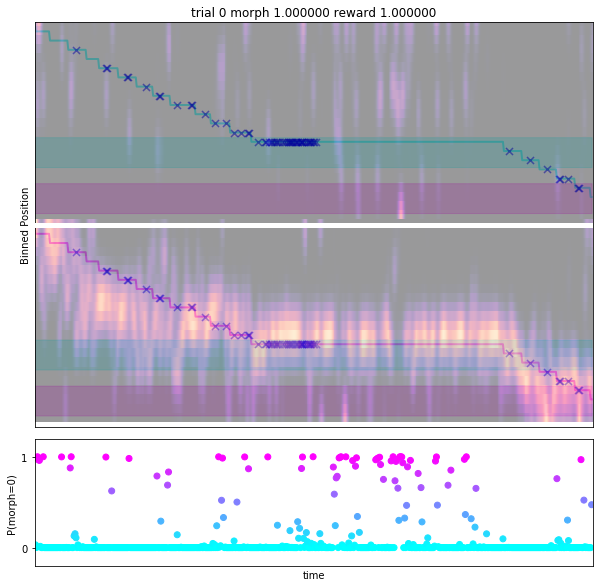

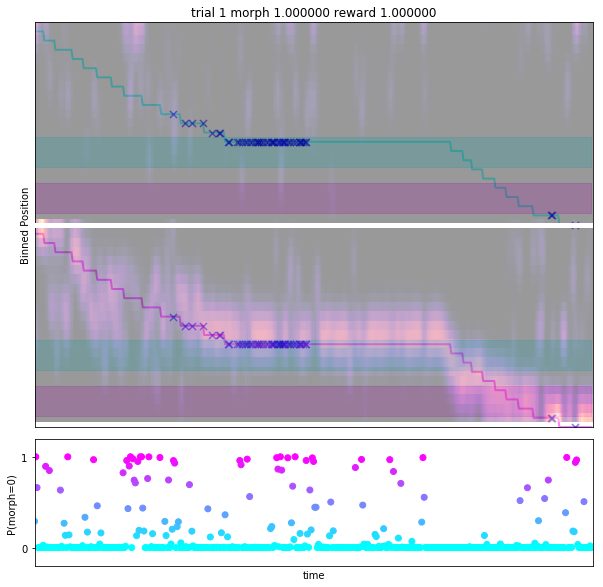

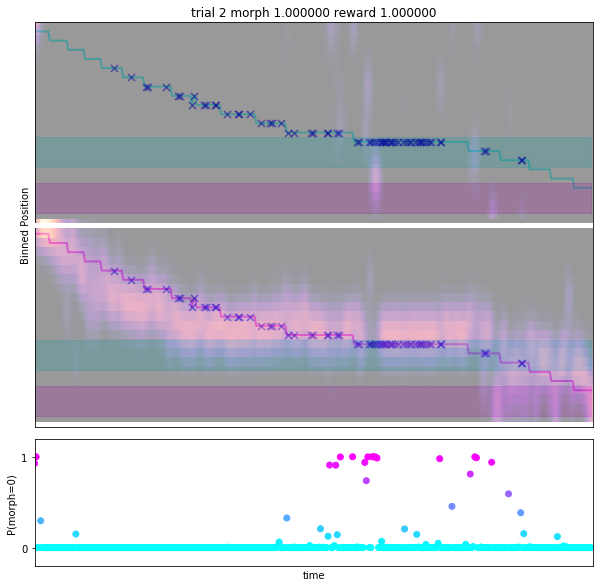

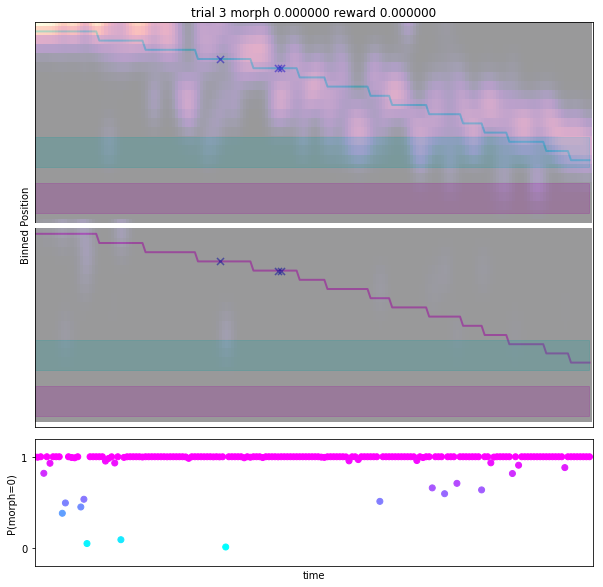

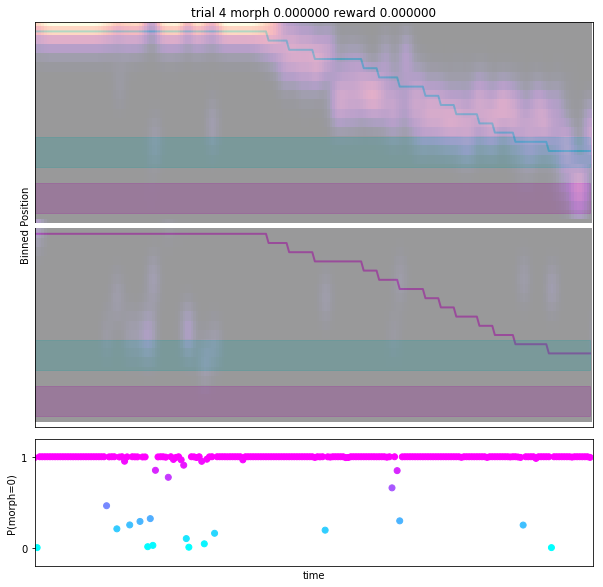

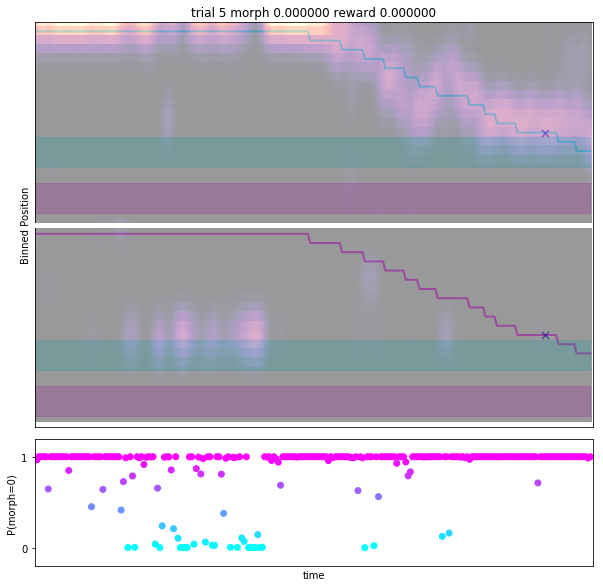

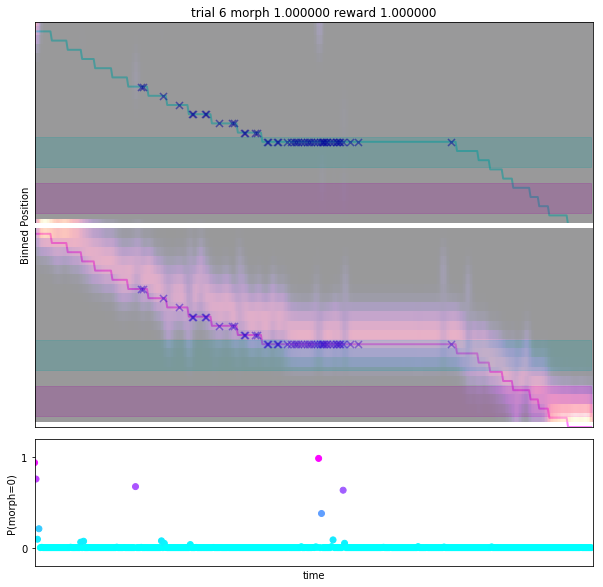

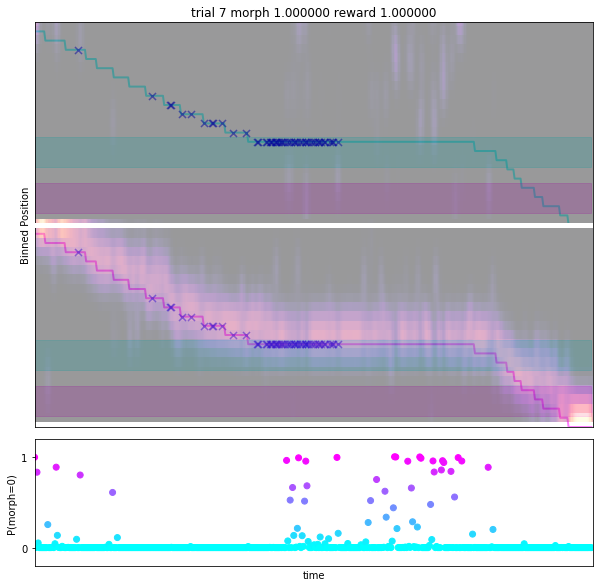

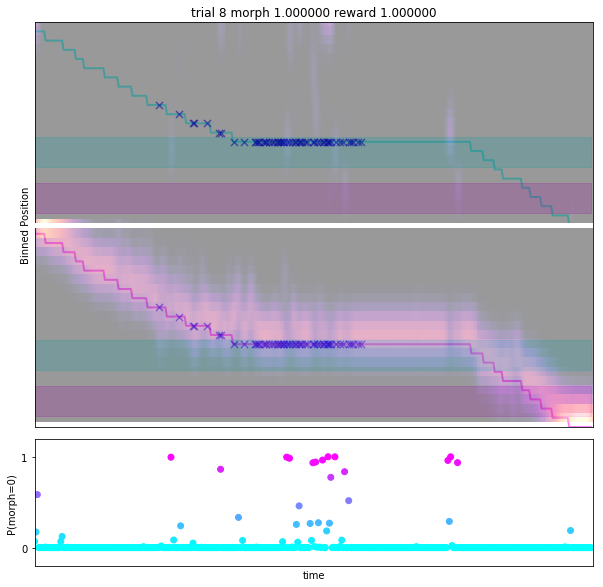

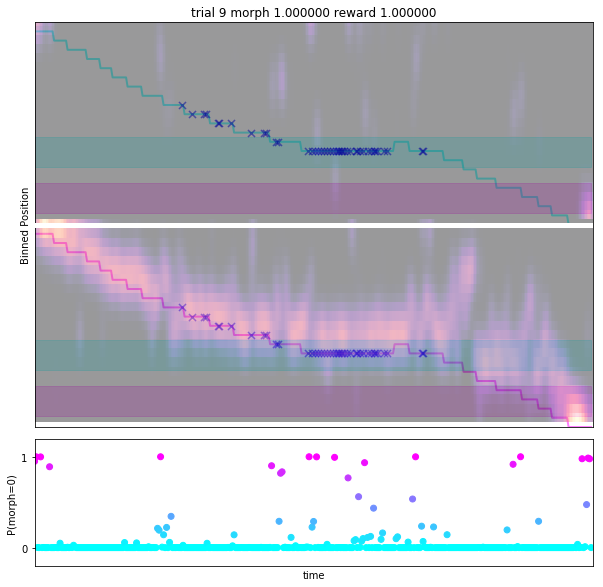

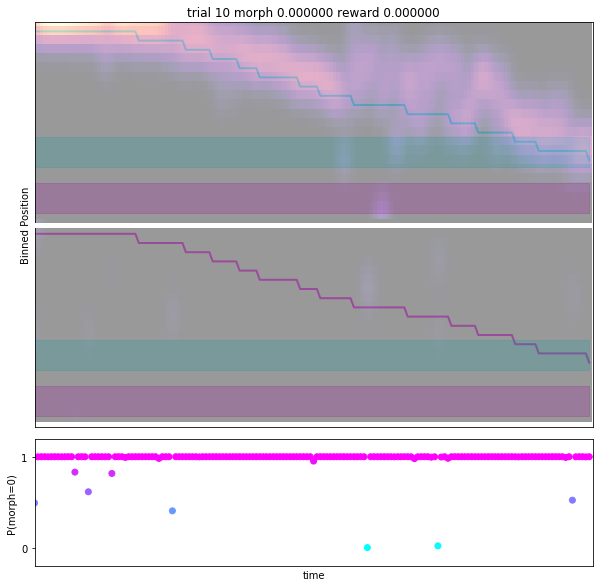

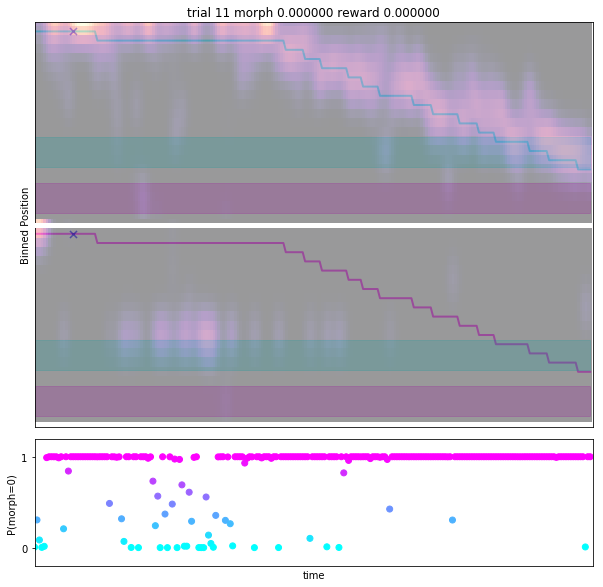

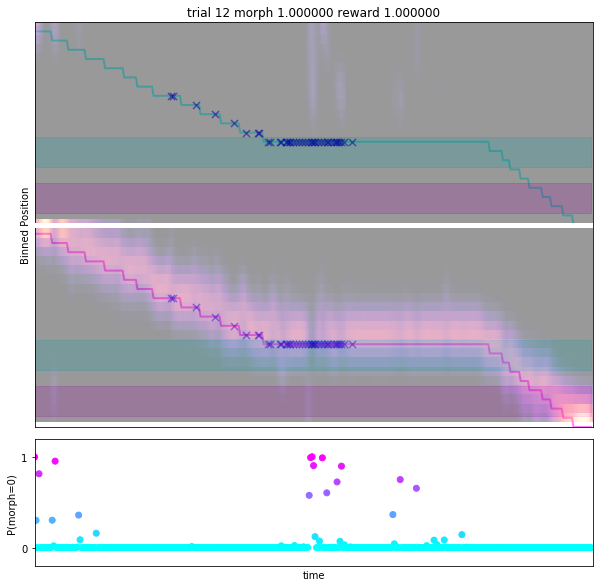

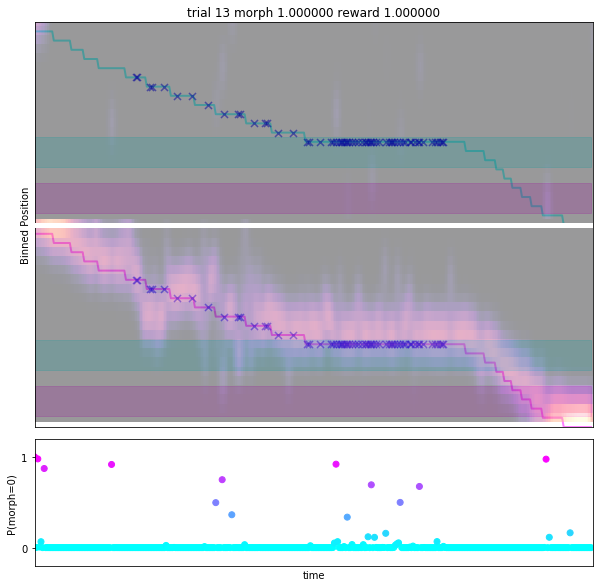

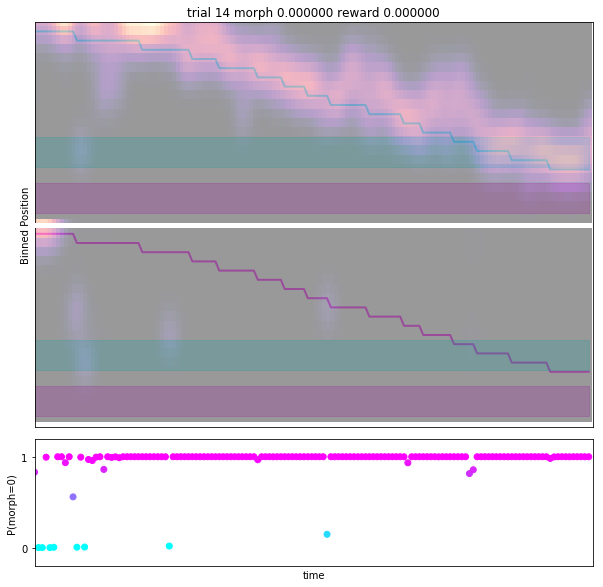

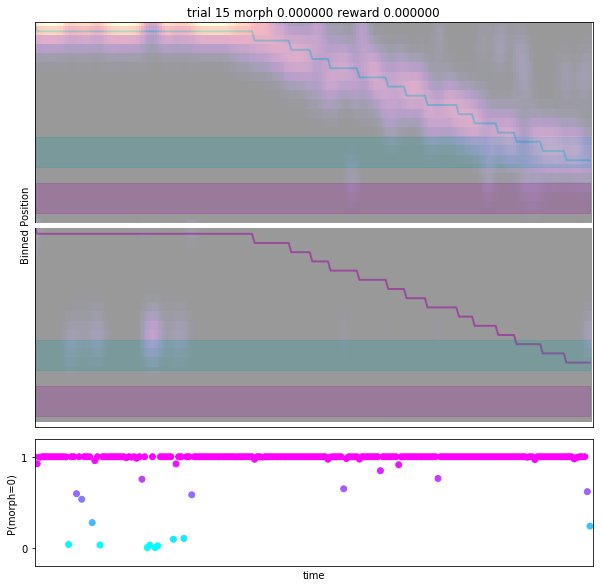

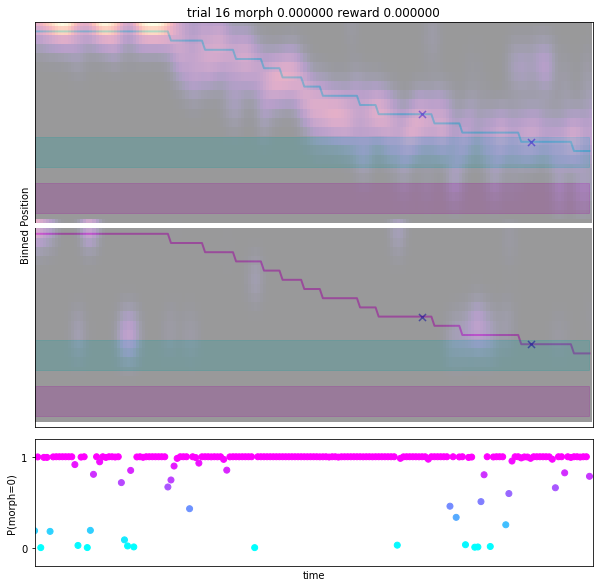

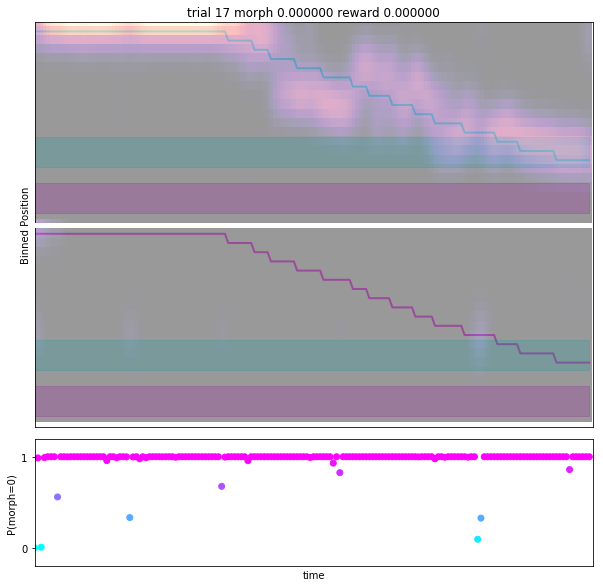

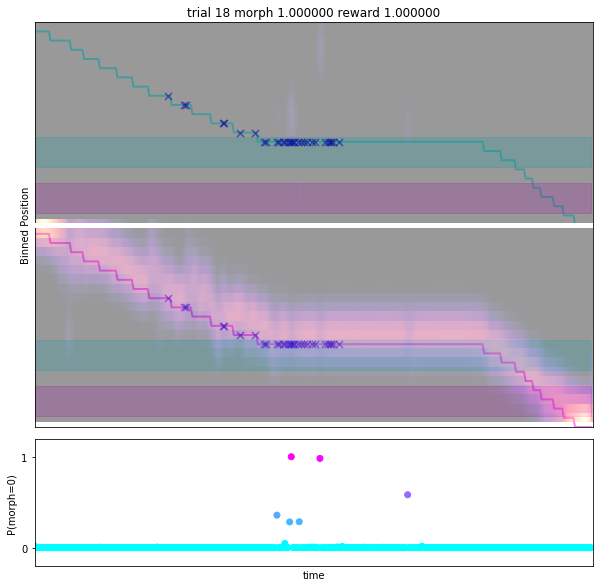

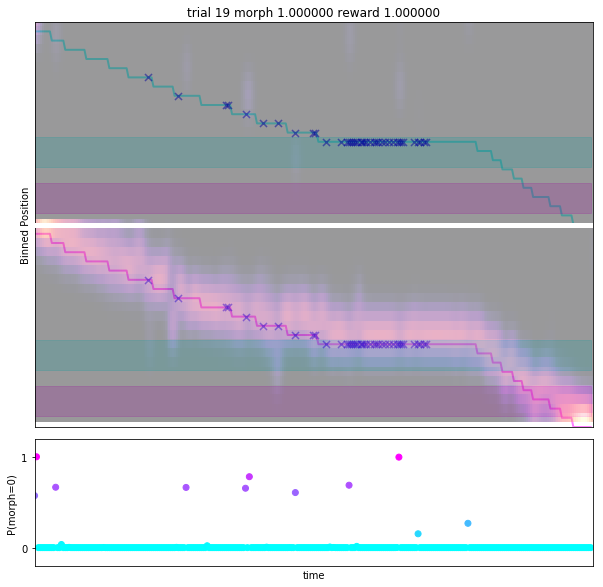

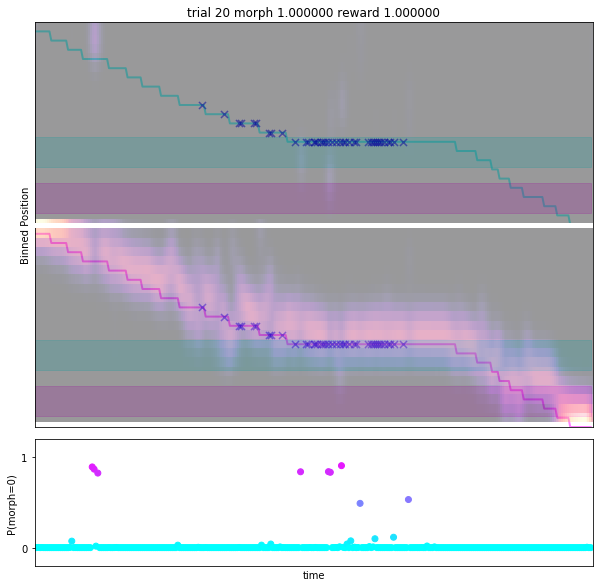

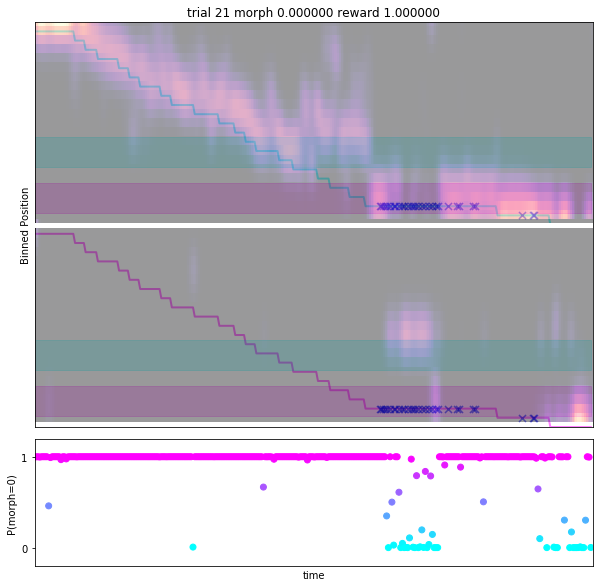

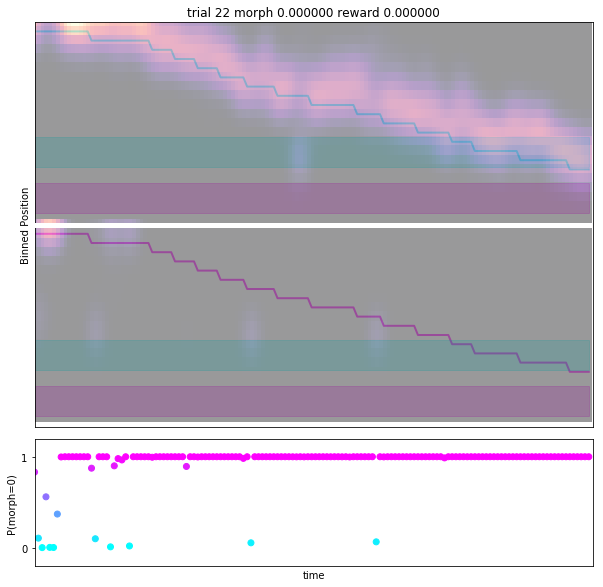

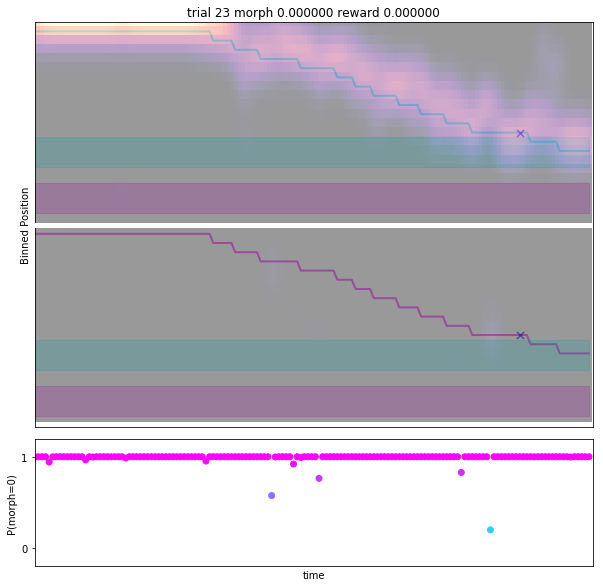

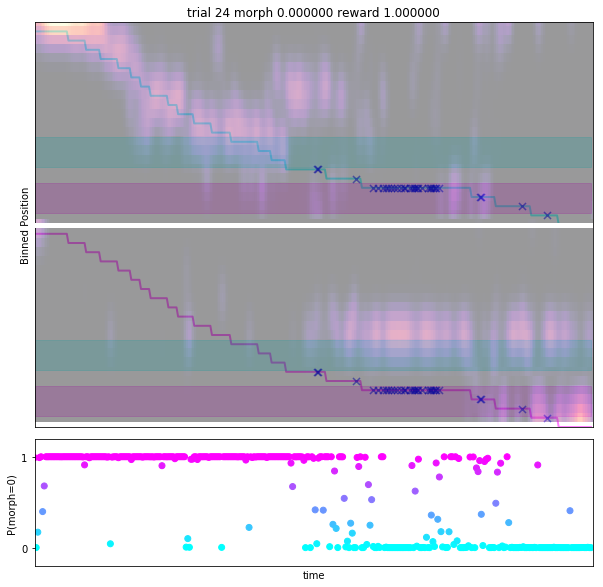

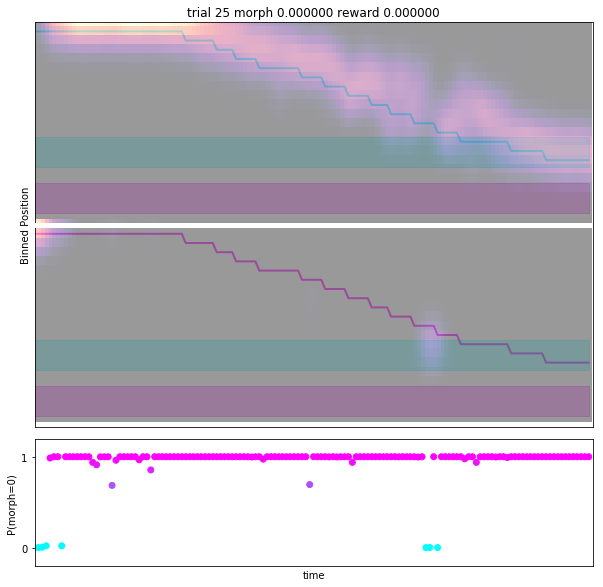

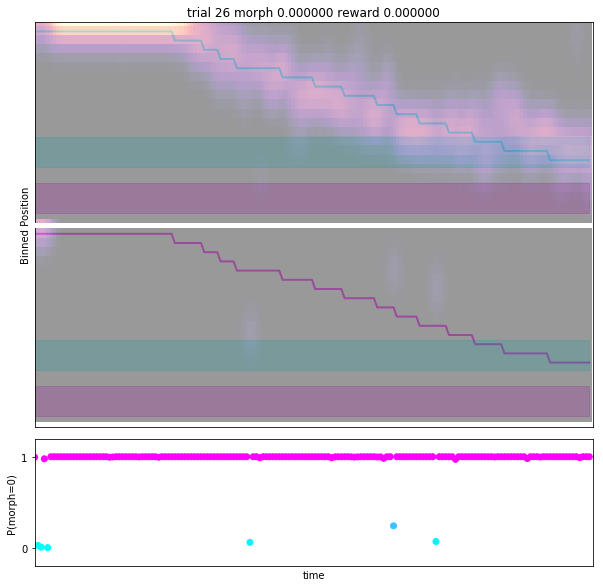

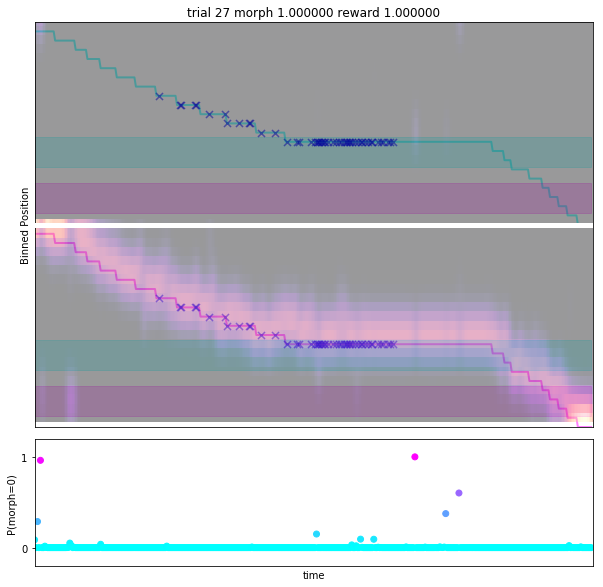

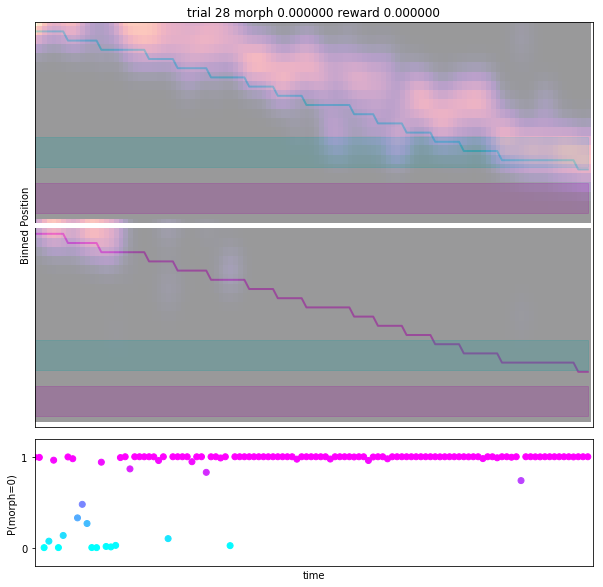

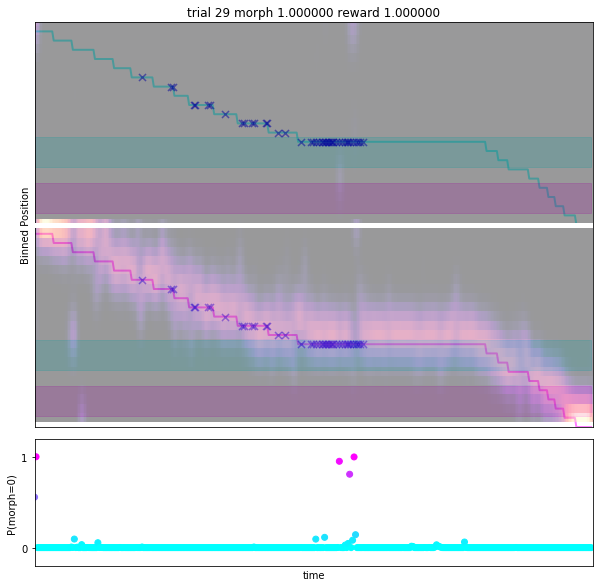

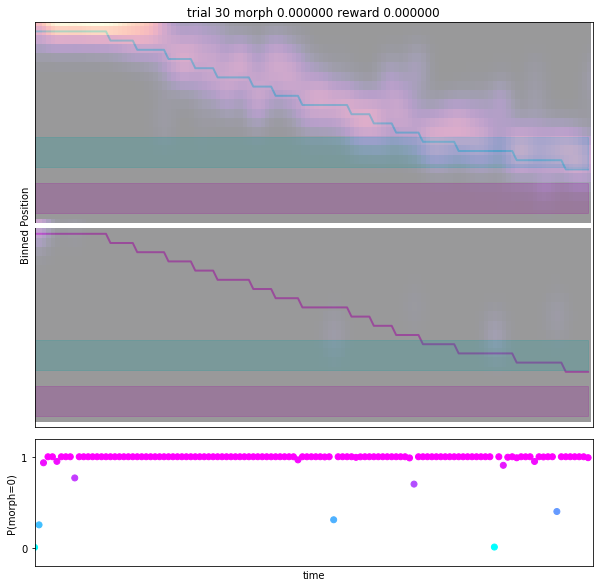

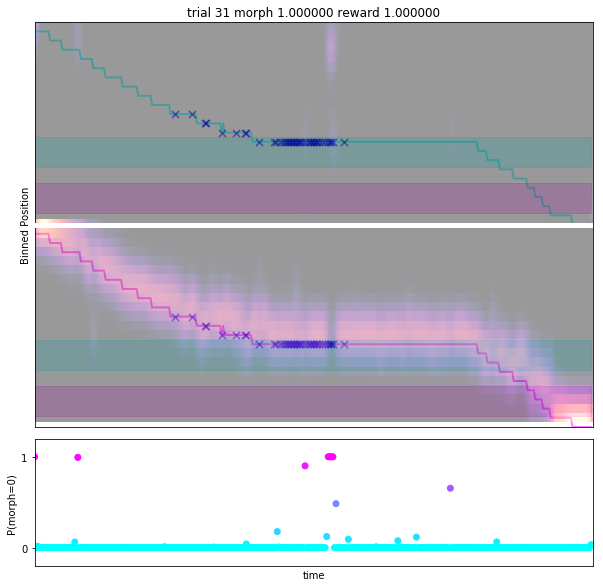

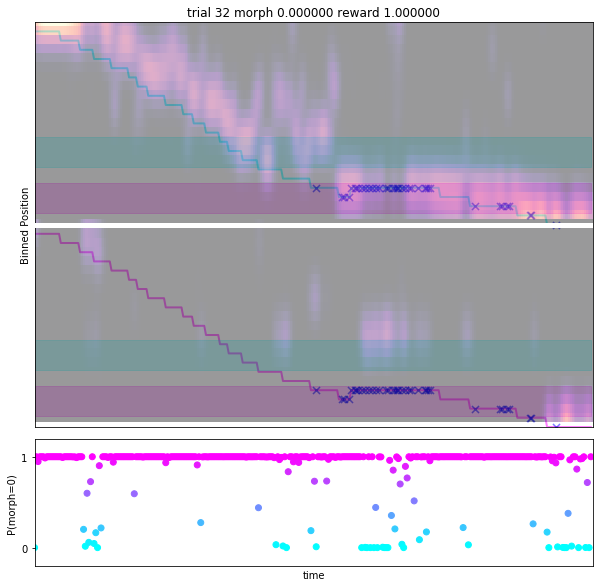

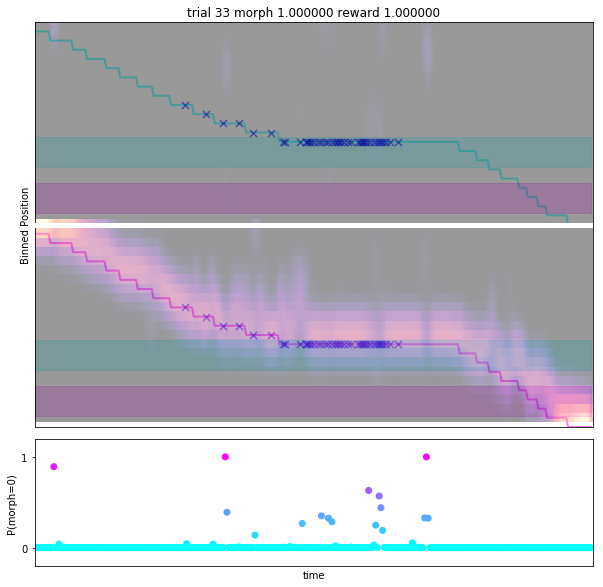

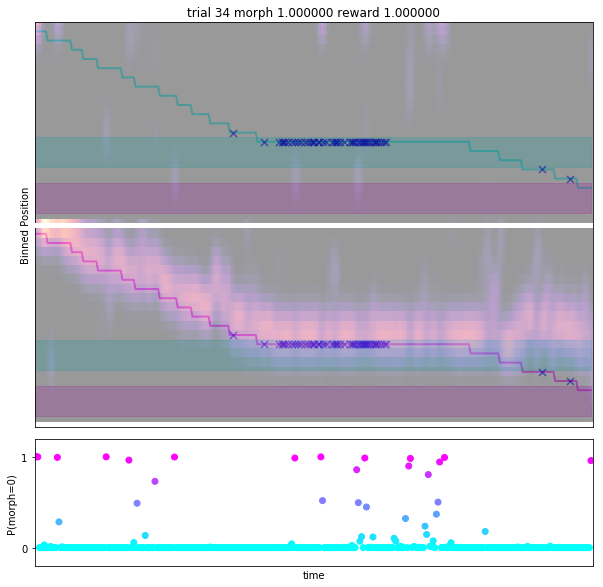

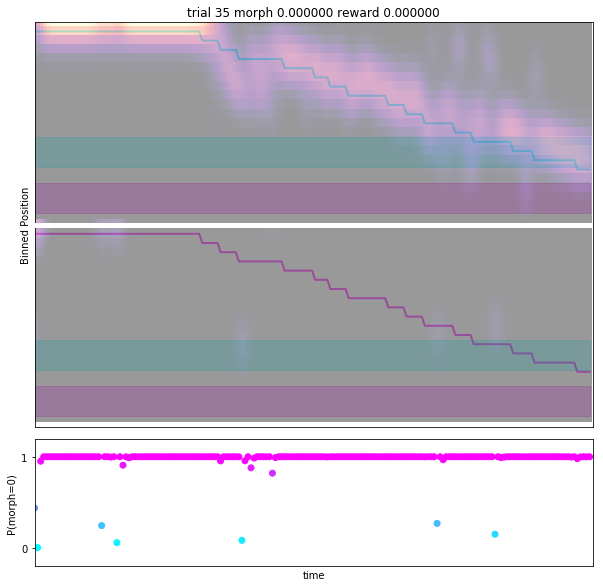

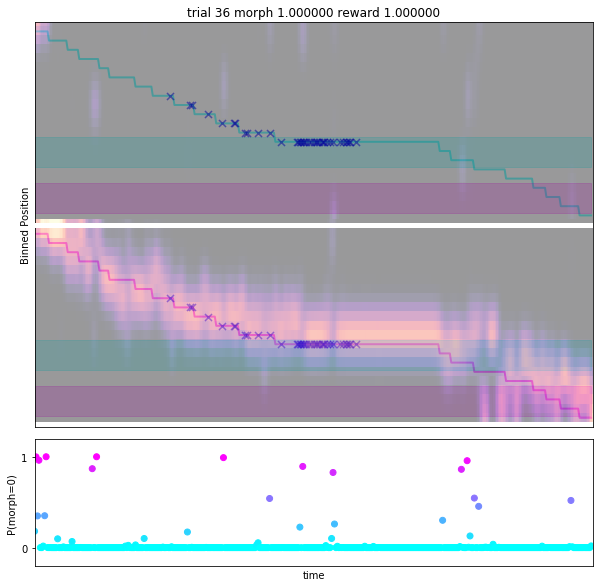

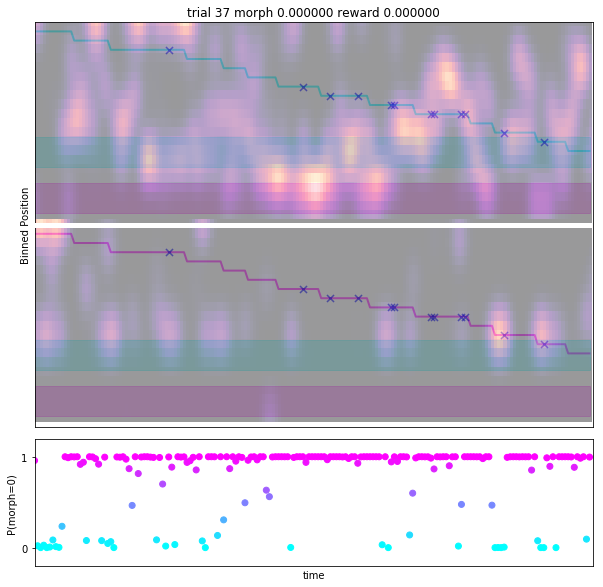

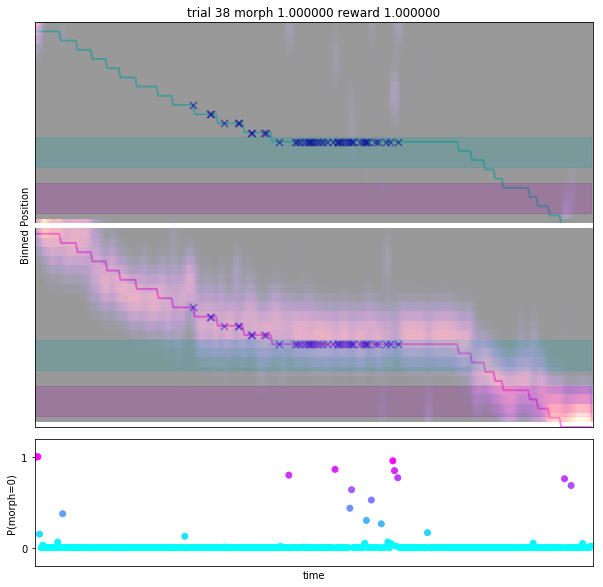

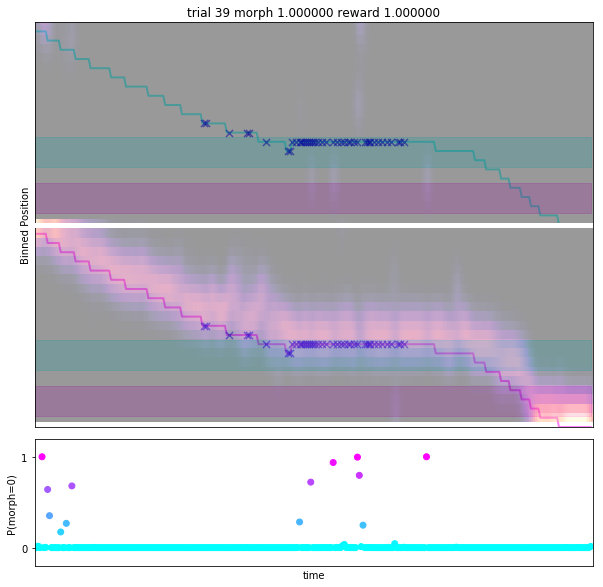

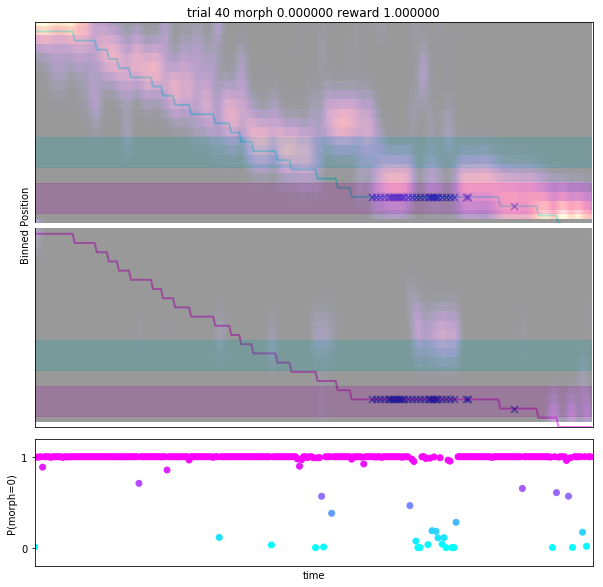

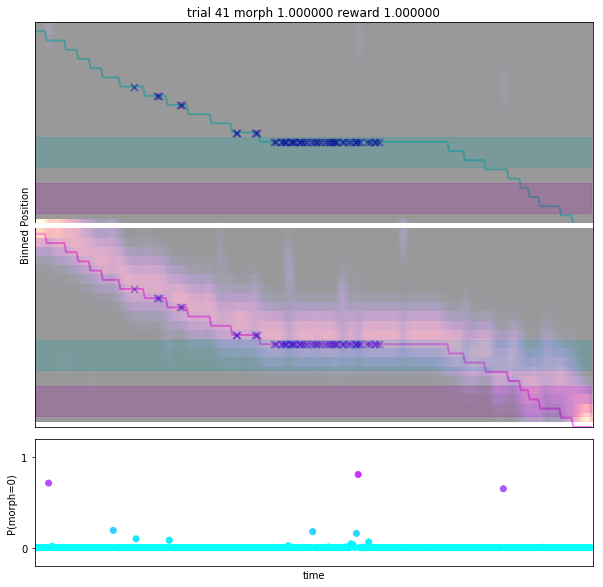

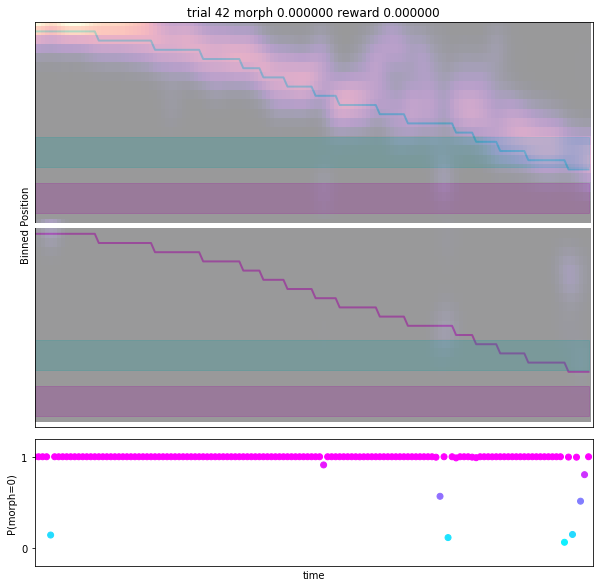

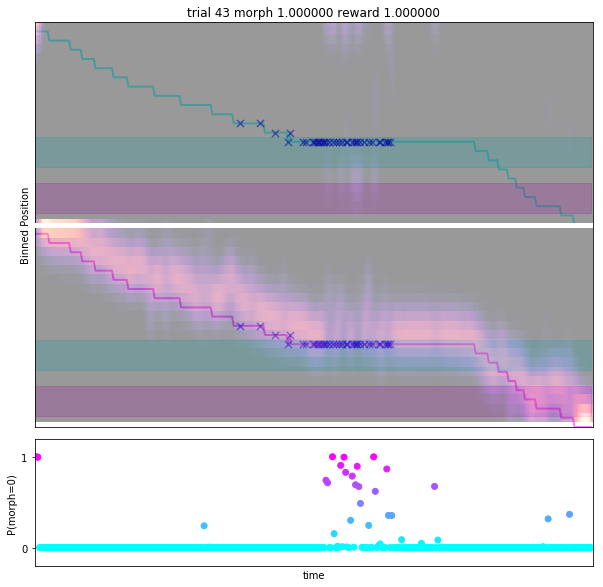

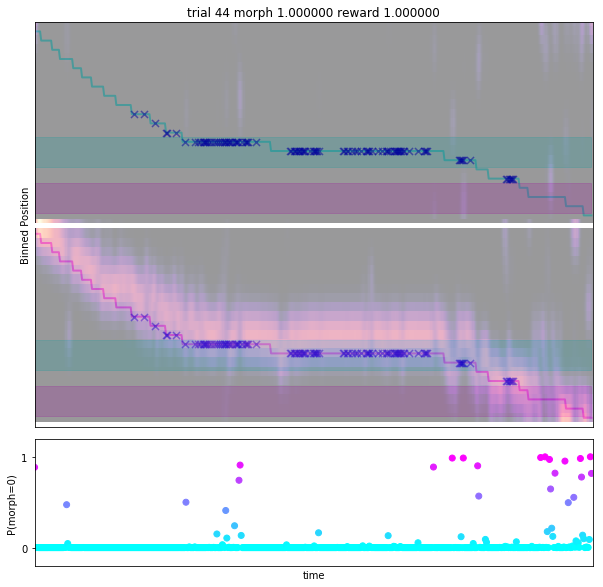

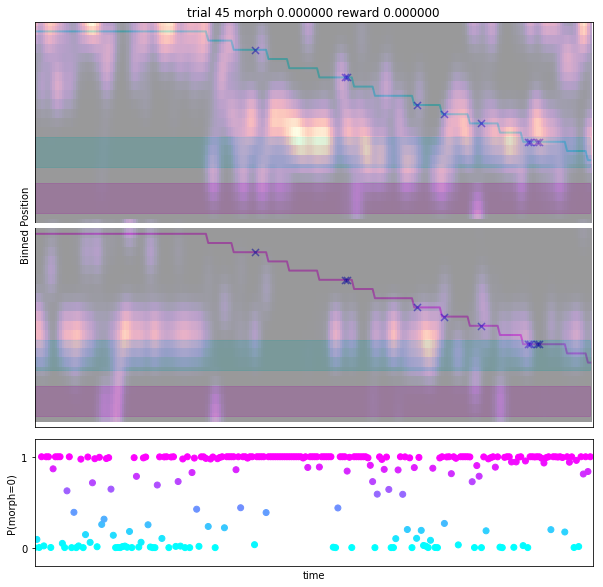

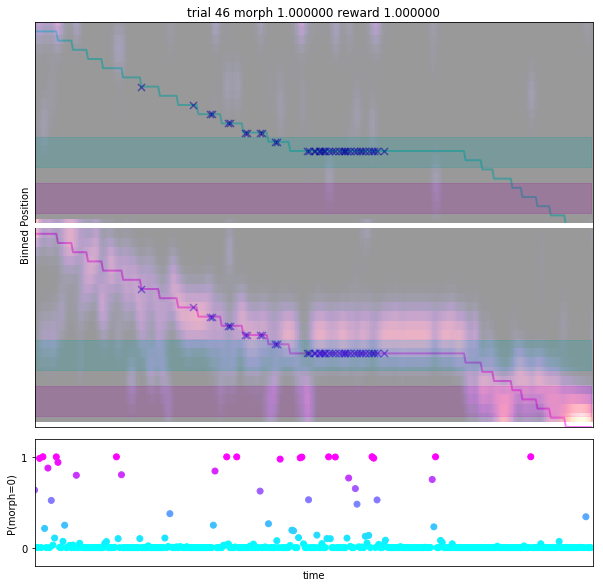

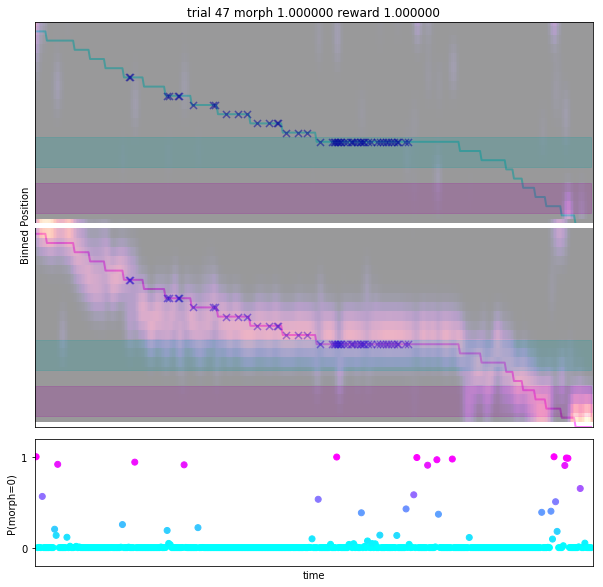

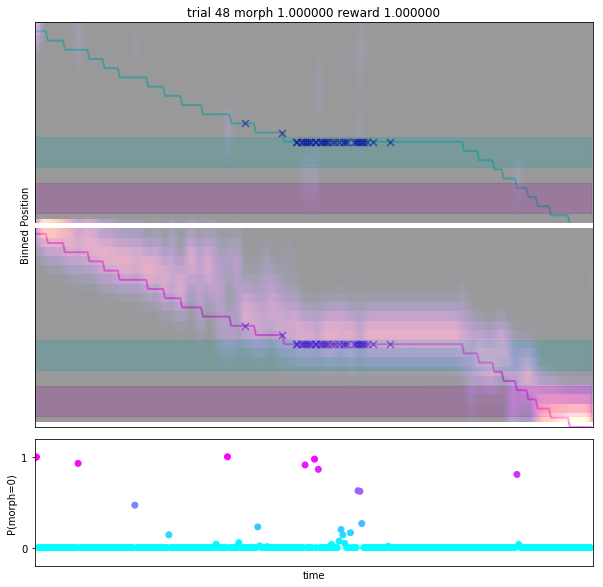

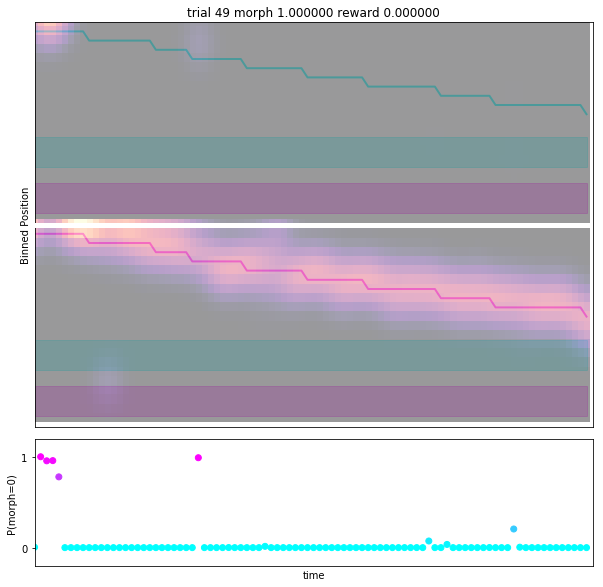

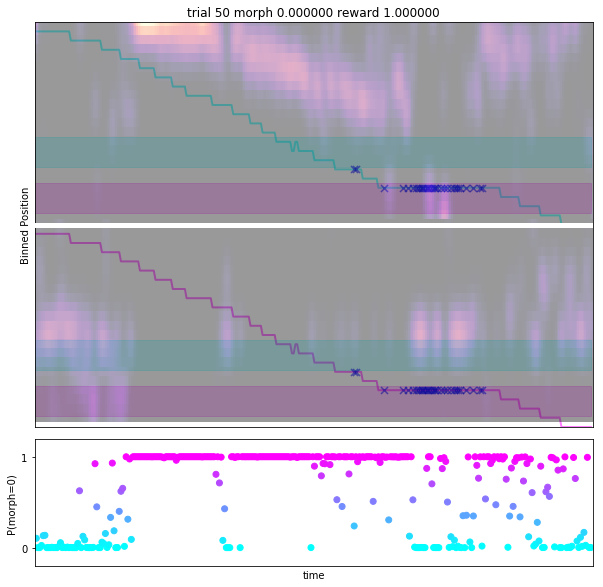

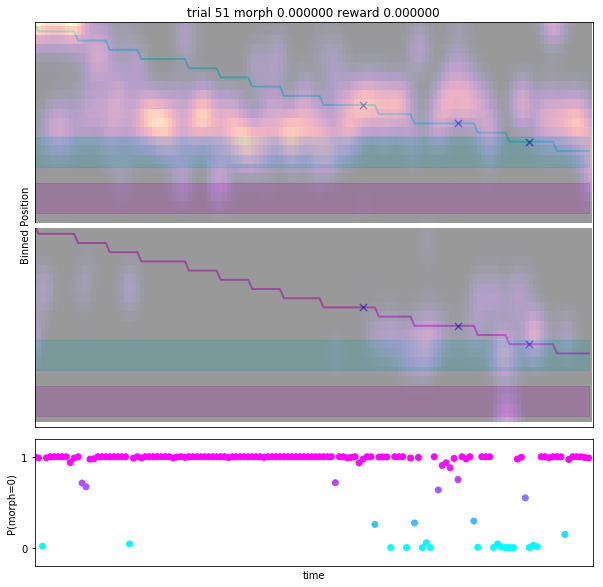

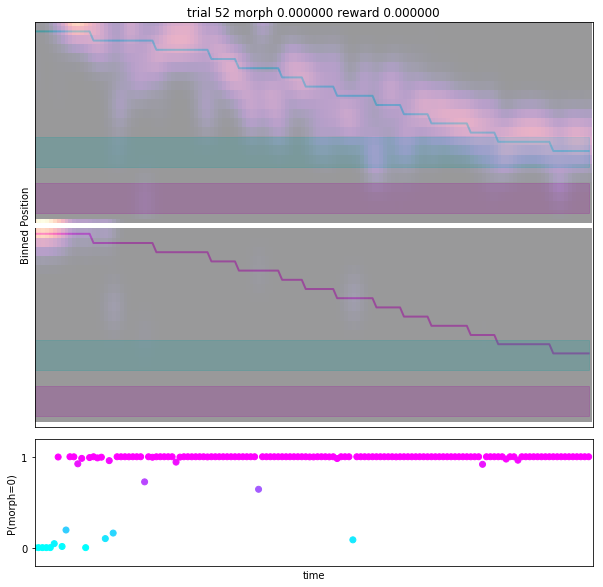

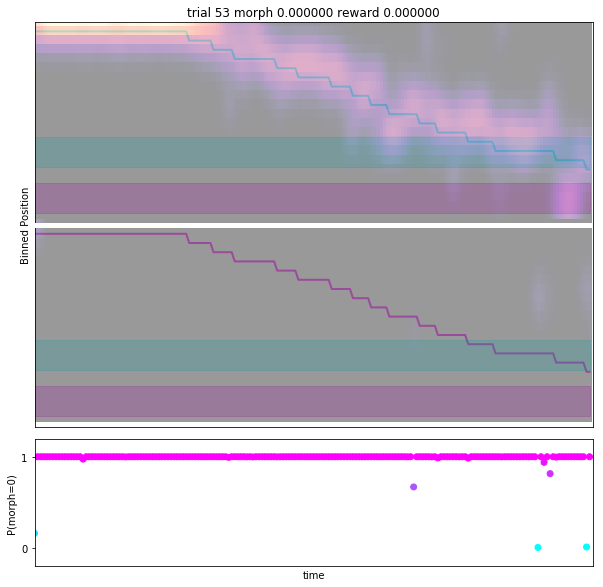

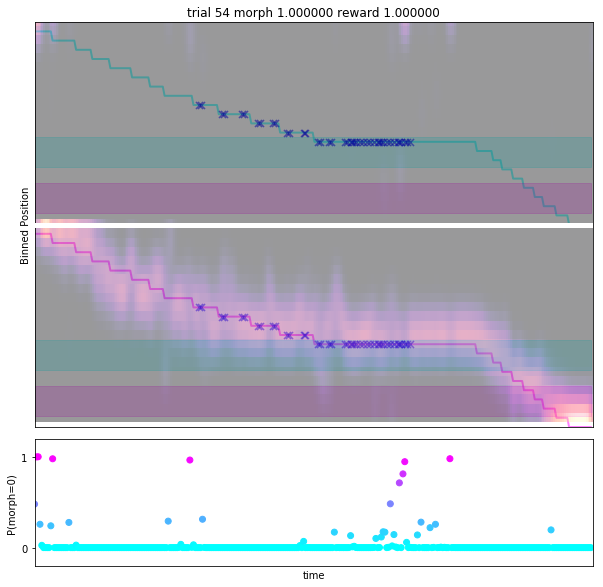

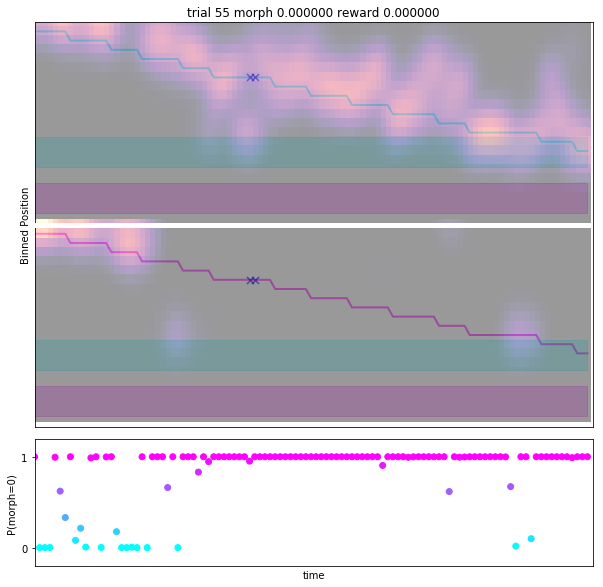

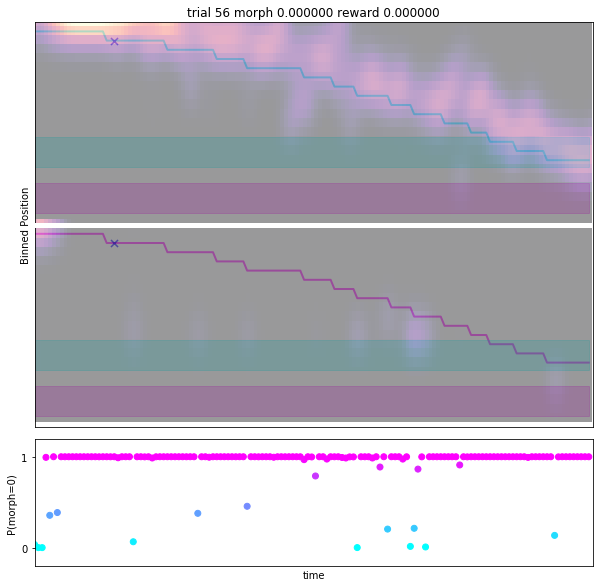

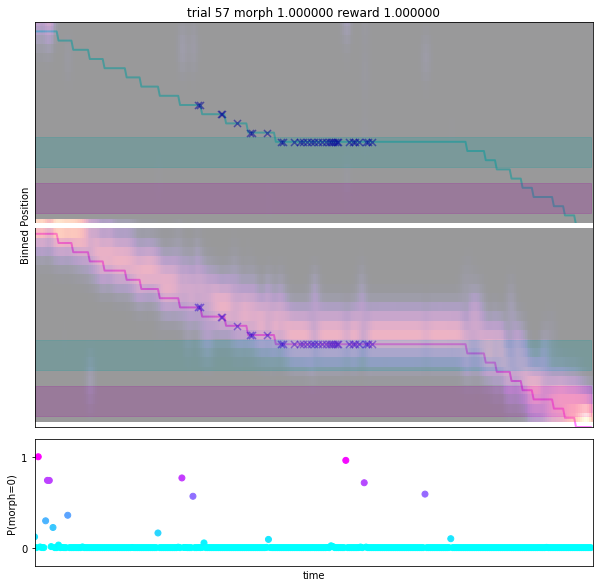

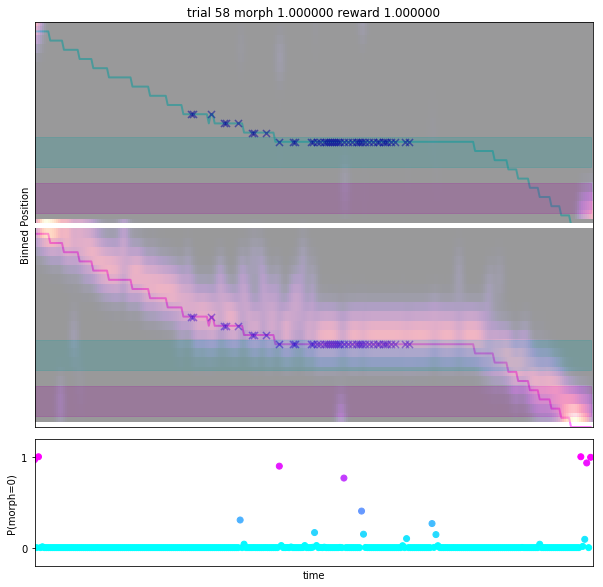

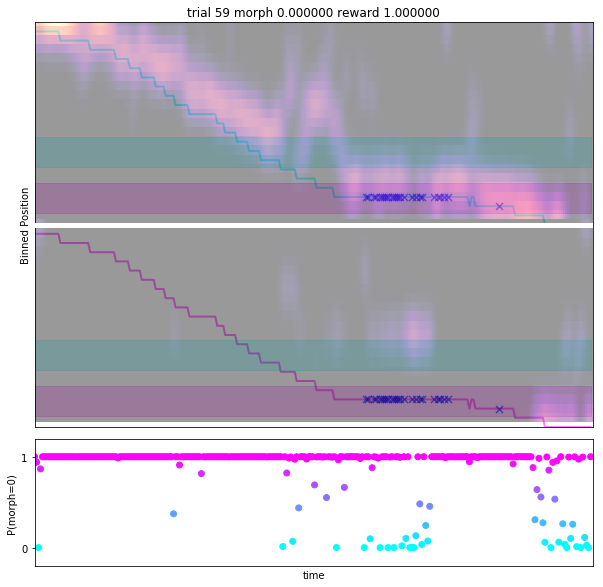

In [112]:
logistic_regression.plot_decoding(res_dict)

C:\Users\mplitt\MightyMorphingPhotonRangers\cosyne_abstract\logistic_regression.py:131: RuntimeWarning: Mean of empty slice
  c_m1lick[:,n*d_trial_mat.shape[1]:(n+1)*d_trial_mat.shape[1]]=np.nanmean(d_trial_mat[m1_mask,:,:],axis=0).T
C:\Users\mplitt\MightyMorphingPhotonRangers\cosyne_abstract\logistic_regression.py:130: RuntimeWarning: Mean of empty slice
  c_m0lick[:,n*d_trial_mat.shape[1]:(n+1)*d_trial_mat.shape[1]]=np.nanmean(d_trial_mat[m0_mask,:,:],axis=0).T


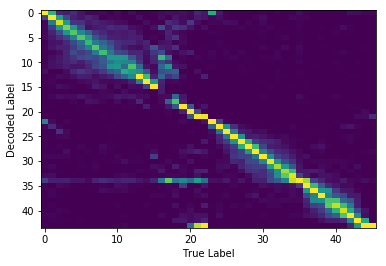

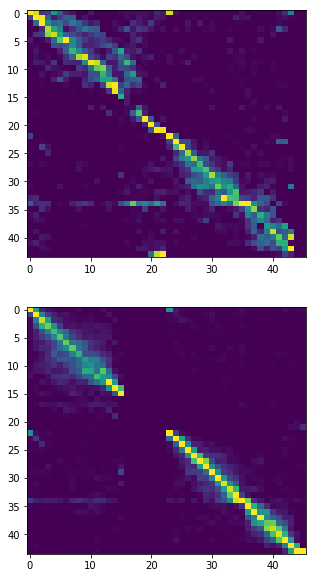

In [114]:
c,c_m0,c_m1 = logistic_regression.confusion_matrix(res_dict,check_pcnt=True,check_omissions=False)

In [ ]:
# bin by position and morph

# try to decode morphs from extremes